In [1]:
%matplotlib inline

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os

import tensorflow as tf

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense, BatchNormalization, Dropout

from tensorflow.keras.datasets import mnist

# Image-Related NNs
## Live Demos

In [34]:
tf.keras.backend.clear_session()

In [35]:
cnn_model = Sequential([
    
    Input(shape = (224, 224, 3)),
    Conv2D(64, kernel_size = (11, 11), padding = "same", activation = "relu"),
    Conv2D(64, kernel_size = (9, 9), padding = "same", activation = "relu"),
    MaxPool2D(),
    BatchNormalization(),
    Conv2D(32, kernel_size = (7, 7), padding = "same", activation = "relu"),
    Conv2D(32, kernel_size = (7, 7), padding = "same", activation = "relu"),
    MaxPool2D(),
    BatchNormalization(),
    Conv2D(16, kernel_size = (5, 5), padding = "same", activation = "relu"),
    Conv2D(16, kernel_size = (3, 3), padding = "same", activation = "relu"),
    MaxPool2D(),
    
    Flatten(),
    BatchNormalization(),
    
    Dense(30, activation = "relu"),
    Dropout(0.1),
    Dense(10, activation = "relu"),
    Dropout(0.05),
    Dense(5, activation = "softmax")
    
])

In [36]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      23296     
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      331840    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 112, 112, 64)     256       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 32)      100384    
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 32)      5

In [38]:
(attributes_train, labels_train), (attributes_test, labels_test) = mnist.load_data()

In [48]:
attributes_train_expanded = np.expand_dims(attributes_train, 3)

In [49]:
attributes_train_expanded = attributes_train_expanded / 255.0

In [44]:
cnn = Sequential([
    Input(shape = (28, 28, 1)),
    Conv2D(64, (3, 3), activation = "relu"),
    Conv2D(32, (3, 3), activation = "relu"),
    MaxPool2D(),
    Conv2D(32, (3, 3), activation = "relu"),
    Conv2D(16, (3, 3), activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(64, activation = "relu"),
    Dropout(0.05),
    Dense(10, activation = "softmax")
])

In [45]:
cnn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 conv2d_16 (Conv2D)          (None, 24, 24, 32)        18464     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_17 (Conv2D)          (None, 10, 10, 32)        9248      
                                                                 
 conv2d_18 (Conv2D)          (None, 8, 8, 16)          4624      
                                                                 
 flatten_3 (Flatten)         (None, 1024)              0         
                                                      

In [51]:
cnn.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [52]:
cnn.fit(attributes_train_expanded, labels_train)

1875/1875 [==============================] - 51s 27ms/step - loss: 0.1420 - accuracy: 0.9563


In [55]:
cnn.layers[0].input_shape, cnn.layers[0].output_shape

((None, 28, 28, 1), (None, 26, 26, 64))

In [54]:
cnn.layers[0].kernel.shape

TensorShape([3, 3, 1, 64])

In [56]:
tf.squeeze(cnn.layers[0].kernel[:, :, :, 0]).numpy()

array([[-0.13876034, -0.01196557,  0.10110622],
       [ 0.02669679,  0.12337692,  0.13412163],
       [ 0.07807753, -0.08043376, -0.00162329]], dtype=float32)

In [57]:
filter_contents = tf.squeeze(cnn.layers[0].kernel[:, :, :, 0]).numpy()

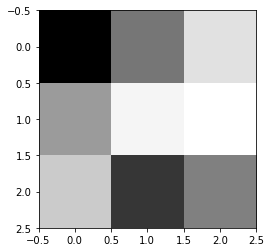

In [59]:
plt.imshow(filter_contents, cmap = "gray")
plt.show()

## Working with data